# TODO: module docstrings use markdown, change those docstrings to fit better.

In [1]:
# Project: CrimesDelits
# Creation Date: 2023-10-11
# History:
######################################################################################################################################################
#   DATE            AUTHOR      VERSION     ACTION
#   2023-10-11      LLEG        1.0.0       Creation

import time
import logging

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.log_config import Logging
from utils.constant import Constant
from utils.functions import download_file, read_xlsx

In [1]:
# load logging config
Logging.create_log_folder()
Logging.load_logging_config("./conf/logging.json")
log = logging.getLogger(__name__)

In [1]:
starting_time = time.time()
log.debug('Start')

In [1]:
# call other modules here
# ...
# ...

In [1]:
download_file(url=Constant.DATA_URL, filepath=Constant.DATA_FILE)
download_file(url=Constant.DOCUMENTATION_URL, filepath=Constant.DOCUMENTATION_FILE)
download_file(url=Constant.INSTRUCTIONS_URL, filepath=Constant.INSTRUCTIONS_FILE)

[INFO] 2023-11-22 21:42:49,622 utils.functions.download_file() 34: crimes-delits.xlsx file already exists
[INFO] 2023-11-22 21:42:49,622 utils.functions.download_file() 34: documentation.docx file already exists
[INFO] 2023-11-22 21:42:49,623 utils.functions.download_file() 34: instructions.pdf file already exists


In [1]:
dict_df = read_xlsx(Constant.DATA_FILE)

In [1]:
total = dict((i, 0) for i in range(1, 108))

for df in dict_df.values():
    for index, _ in df.iterrows():
        total[index] += df.loc[index, :].sum()

total = dict(sorted(total.items(), key=lambda item: item[1], reverse=True))

for key, value in total.items():
    print(f"index: {key}, total: {value}")

index: 43, total: 3342820.0
index: 37, total: 2586123.0
index: 7, total: 2436894.0
index: 91, total: 2238067.0
index: 27, total: 2157769.0
index: 42, total: 1873313.0
index: 57, total: 1727518.0
index: 32, total: 1317596.0
index: 107, total: 1248000.0
index: 67, total: 1121396.0
index: 12, total: 1073885.0
index: 38, total: 1028597.0
index: 35, total: 1017991.0
index: 68, total: 998464.0
index: 29, total: 674818.0
index: 89, total: 654977.0
index: 41, total: 634959.0
index: 33, total: 615282.0
index: 30, total: 595857.0
index: 90, total: 560966.0
index: 36, total: 554876.0
index: 13, total: 515233.0
index: 26, total: 468801.0
index: 52, total: 437378.0
index: 25, total: 414864.0
index: 44, total: 390547.0
index: 66, total: 357914.0
index: 74, total: 349581.0
index: 73, total: 330563.0
index: 53, total: 312936.0
index: 63, total: 300613.0
index: 72, total: 274907.0
index: 56, total: 217308.0
index: 28, total: 186696.0
index: 69, total: 173555.0
index: 49, total: 150690.0
index: 39, tota

In [1]:
data = {(key[9:11], key[-4:], dict_df[key].loc[57, :].sum()) for key in dict_df.keys()}
df = pd.DataFrame(data=data, columns=["services", "year", "total"])
df

,services,year,total
0,PN,2013,123949.0
1,GN,2018,51848.0
2,PN,2017,124158.0
3,PN,2014,125523.0
4,GN,2019,51549.0
5,PN,2020,97896.0
6,PN,2016,121621.0
7,GN,2014,51092.0
8,GN,2017,53546.0
9,GN,2016,53289.0


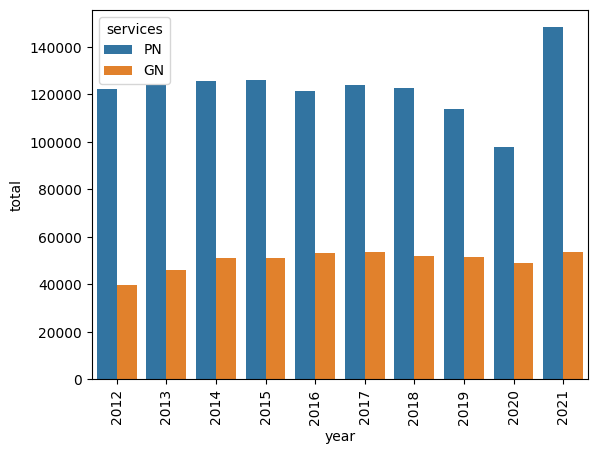

In [1]:
sns.barplot(data=df, x="year", y="total", hue="services", order=sorted(df["year"]))
plt.xticks(rotation=90)
plt.show()

In [1]:
# work with dafaframe of Services PN 2012 xlsx sheet
current_df = dict_df.get('Services PN 2012')
columns = current_df.columns

# flatten MultiIndex to 'Départements' level
current_df.columns = current_df.columns.get_level_values('Départements')

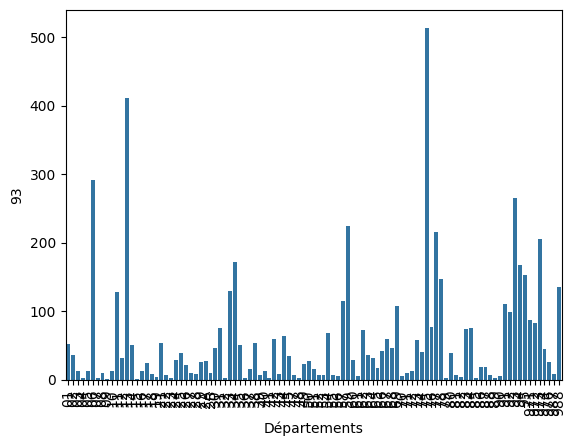

In [1]:
# plot a graph of summed data by department
sns.barplot(current_df.loc[93, :][current_df.loc[93, :] != 0], estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [1]:
# get back MultiIndex
# current_df.columns = columns

In [1]:
log.debug('End')
log.info('Finished successfully in %.2fs', time.time() - starting_time)

[INFO] 2023-11-22 21:42:53,954 __main__.<module>() 2: Finished successfully in 4.34s
